In [10]:
!pip install pandas numpy scipy statsmodels matplotlib seaborn

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [16]:
pokemon_data = [
    {"Number": 1, "Name": "Bulbasaur", "Type 1": "Grass", "HP": 45, "Attack": 49, "Defense": 49, "Sp. Atk": 65, "Sp. Def": 65, "Speed": 45, "Total": 318},
    {"Number": 2, "Name": "Ivysaur", "Type 1": "Grass", "HP": 60, "Attack": 62, "Defense": 63, "Sp. Atk": 80, "Sp. Def": 80, "Speed": 60, "Total": 405},
    {"Number": 3, "Name": "Venusaur", "Type 1": "Grass", "HP": 80, "Attack": 82, "Defense": 83, "Sp. Atk": 100, "Sp. Def": 100, "Speed": 80, "Total": 525},
    {"Number": 4, "Name": "Charmander", "Type 1": "Fire", "HP": 39, "Attack": 52, "Defense": 43, "Sp. Atk": 60, "Sp. Def": 50, "Speed": 65, "Total": 309},
    {"Number": 5, "Name": "Charmeleon", "Type 1": "Fire", "HP": 58, "Attack": 64, "Defense": 58, "Sp. Atk": 80, "Sp. Def": 65, "Speed": 80, "Total": 405},
    {"Number": 6, "Name": "Charizard", "Type 1": "Fire", "HP": 78, "Attack": 84, "Defense": 78, "Sp. Atk": 109, "Sp. Def": 85, "Speed": 100, "Total": 534},
    {"Number": 7, "Name": "Squirtle", "Type 1": "Water", "HP": 44, "Attack": 48, "Defense": 65, "Sp. Atk": 50, "Sp. Def": 64, "Speed": 43, "Total": 314},
    {"Number": 8, "Name": "Wartortle", "Type 1": "Water", "HP": 59, "Attack": 63, "Defense": 80, "Sp. Atk": 65, "Sp. Def": 80, "Speed": 58, "Total": 405},
    {"Number": 9, "Name": "Blastoise", "Type 1": "Water", "HP": 79, "Attack": 83, "Defense": 100, "Sp. Atk": 85, "Sp. Def": 105, "Speed": 78, "Total": 530},
    {"Number": 10, "Name": "Caterpie", "Type 1": "Bug", "HP": 45, "Attack": 30, "Defense": 35, "Sp. Atk": 20, "Sp. Def": 20, "Speed": 45, "Total": 195},
    {"Number": 11, "Name": "Metapod", "Type 1": "Bug", "HP": 50, "Attack": 20, "Defense": 55, "Sp. Atk": 25, "Sp. Def": 25, "Speed": 30, "Total": 205},
    {"Number": 12, "Name": "Butterfree", "Type 1": "Bug", "HP": 60, "Attack": 45, "Defense": 50, "Sp. Atk": 90, "Sp. Def": 80, "Speed": 70, "Total": 395},
    {"Number": 13, "Name": "Weedle", "Type 1": "Bug", "HP": 40, "Attack": 35, "Defense": 30, "Sp. Atk": 20, "Sp. Def": 20, "Speed": 50, "Total": 195},
    {"Number": 14, "Name": "Kakuna", "Type 1": "Bug", "HP": 45, "Attack": 25, "Defense": 50, "Sp. Atk": 25, "Sp. Def": 25, "Speed": 35, "Total": 205},
    {"Number": 15, "Name": "Beedrill", "Type 1": "Bug", "HP": 65, "Attack": 90, "Defense": 40, "Sp. Atk": 45, "Sp. Def": 80, "Speed": 75, "Total": 395},
    {"Number": 16, "Name": "Pidgey", "Type 1": "Normal", "HP": 40, "Attack": 45, "Defense": 40, "Sp. Atk": 35, "Sp. Def": 35, "Speed": 56, "Total": 251},
    {"Number": 17, "Name": "Pidgeotto", "Type 1": "Normal", "HP": 63, "Attack": 60, "Defense": 55, "Sp. Atk": 50, "Sp. Def": 50, "Speed": 71, "Total": 349},
    {"Number": 18, "Name": "Pidgeot", "Type 1": "Normal", "HP": 83, "Attack": 80, "Defense": 75, "Sp. Atk": 70, "Sp. Def": 70, "Speed": 101, "Total": 479},
    {"Number": 19, "Name": "Rattata", "Type 1": "Normal", "HP": 30, "Attack": 56, "Defense": 35, "Sp. Atk": 25, "Sp. Def": 35, "Speed": 72, "Total": 253},
    {"Number": 20, "Name": "Raticate", "Type 1": "Normal", "HP": 55, "Attack": 81, "Defense": 60, "Sp. Atk": 50, "Sp. Def": 70, "Speed": 97, "Total": 413},
    {"Number": 21, "Name": "Spearow", "Type 1": "Normal", "HP": 40, "Attack": 60, "Defense": 30, "Sp. Atk": 31, "Sp. Def": 31, "Speed": 70, "Total": 262},
    {"Number": 22, "Name": "Fearow", "Type 1": "Normal", "HP": 65, "Attack": 90, "Defense": 65, "Sp. Atk": 61, "Sp. Def": 61, "Speed": 100, "Total": 442},
    {"Number": 23, "Name": "Ekans", "Type 1": "Poison", "HP": 35, "Attack": 60, "Defense": 44, "Sp. Atk": 40, "Sp. Def": 54, "Speed": 55, "Total": 288},
    {"Number": 24, "Name": "Arbok", "Type 1": "Poison", "HP": 60, "Attack": 85, "Defense": 69, "Sp. Atk": 65, "Sp. Def": 79, "Speed": 80, "Total": 438},
    {"Number": 25, "Name": "Pikachu", "Type 1": "Electric", "HP": 35, "Attack": 55, "Defense": 40, "Sp. Atk": 50, "Sp. Def": 50, "Speed": 90, "Total": 320},
    {"Number": 26, "Name": "Raichu", "Type 1": "Electric", "HP": 60, "Attack": 90, "Defense": 55, "Sp. Atk": 90, "Sp. Def": 80, "Speed": 110, "Total": 485},
    {"Number": 27, "Name": "Sandshrew", "Type 1": "Ground", "HP": 50, "Attack": 75, "Defense": 85, "Sp. Atk": 20, "Sp. Def": 30, "Speed": 40, "Total": 300},
    {"Number": 28, "Name": "Sandslash", "Type 1": "Ground", "HP": 75, "Attack": 100, "Defense": 110, "Sp. Atk": 45, "Sp. Def": 55, "Speed": 65, "Total": 450},
    {"Number": 29, "Name": "Nidoran♀", "Type 1": "Poison", "HP": 55, "Attack": 47, "Defense": 52, "Sp. Atk": 40, "Sp. Def": 40, "Speed": 41, "Total": 275},
    {"Number": 30, "Name": "Nidorina", "Type 1": "Poison", "HP": 70, "Attack": 62, "Defense": 67, "Sp. Atk": 55, "Sp. Def": 55, "Speed": 56, "Total": 365},
    {"Number": 31, "Name": "Nidoqueen", "Type 1": "Poison", "HP": 90, "Attack": 92, "Defense": 87, "Sp. Atk": 75, "Sp. Def": 85, "Speed": 76, "Total": 505},
    {"Number": 32, "Name": "Nidoran♂", "Type 1": "Poison", "HP": 46, "Attack": 57, "Defense": 40, "Sp. Atk": 40, "Sp. Def": 40, "Speed": 50, "Total": 273},
    {"Number": 33, "Name": "Nidorino", "Type 1": "Poison", "HP": 61, "Attack": 72, "Defense": 57, "Sp. Atk": 55, "Sp. Def": 55, "Speed": 65, "Total": 365},
    {"Number": 34, "Name": "Nidoking", "Type 1": "Poison", "HP": 81, "Attack": 102, "Defense": 77, "Sp. Atk": 85, "Sp. Def": 75, "Speed": 85, "Total": 505},
    {"Number": 35, "Name": "Clefairy", "Type 1": "Fairy", "HP": 70, "Attack": 45, "Defense": 48, "Sp. Atk": 60, "Sp. Def": 65, "Speed": 35, "Total": 323},
    {"Number": 36, "Name": "Clefable", "Type 1": "Fairy", "HP": 95, "Attack": 70, "Defense": 73, "Sp. Atk": 95, "Sp. Def": 90, "Speed": 60, "Total": 483},
    {"Number": 37, "Name": "Vulpix", "Type 1": "Fire", "HP": 38, "Attack": 41, "Defense": 40, "Sp. Atk": 50, "Sp. Def": 65, "Speed": 65, "Total": 299},
    {"Number": 38, "Name": "Ninetales", "Type 1": "Fire", "HP": 73, "Attack": 76, "Defense": 75, "Sp. Atk": 81, "Sp. Def": 100, "Speed": 100, "Total": 505},
    {"Number": 39, "Name": "Jigglypuff", "Type 1": "Normal", "HP": 115, "Attack": 45, "Defense": 20, "Sp. Atk": 45, "Sp. Def": 25, "Speed": 20, "Total": 270},
    {"Number": 40, "Name": "Wigglytuff", "Type 1": "Normal", "HP": 140, "Attack": 70, "Defense": 45, "Sp. Atk": 85, "Sp. Def": 50, "Speed": 45, "Total": 435},
    {"Number": 41, "Name": "Zubat", "Type 1": "Poison", "HP": 40, "Attack": 45, "Defense": 35, "Sp. Atk": 30, "Sp. Def": 40, "Speed": 55, "Total": 245},
    {"Number": 42, "Name": "Golbat", "Type 1": "Poison", "HP": 75, "Attack": 80, "Defense": 70, "Sp. Atk": 65, "Sp. Def": 75, "Speed": 90, "Total": 455},
    {"Number": 43, "Name": "Oddish", "Type 1": "Grass", "HP": 45, "Attack": 50, "Defense": 55, "Sp. Atk": 75, "Sp. Def": 65, "Speed": 30, "Total": 320},
    {"Number": 44, "Name": "Gloom", "Type 1": "Grass", "HP": 60, "Attack": 65, "Defense": 70, "Sp. Atk": 85, "Sp. Def": 75, "Speed": 40, "Total": 395},
    {"Number": 45, "Name": "Vileplume", "Type 1": "Grass", "HP": 75, "Attack": 80, "Defense": 85, "Sp. Atk": 110, "Sp. Def": 90, "Speed": 50, "Total": 490},
    {"Number": 46, "Name": "Paras", "Type 1": "Bug", "HP": 35, "Attack": 70, "Defense": 55, "Sp. Atk": 45, "Sp. Def": 55, "Speed": 25, "Total": 285},
    {"Number": 47, "Name": "Parasect", "Type 1": "Bug", "HP": 60, "Attack": 95, "Defense": 80, "Sp. Atk": 60, "Sp. Def": 80, "Speed": 30, "Total": 405},
    {"Number": 48, "Name": "Venonat", "Type 1": "Bug", "HP": 60, "Attack": 55, "Defense": 50, "Sp. Atk": 40, "Sp. Def": 55, "Speed": 45, "Total": 305},
    {"Number": 49, "Name": "Venomoth", "Type 1": "Bug", "HP": 70, "Attack": 65, "Defense": 60, "Sp. Atk": 90, "Sp. Def": 75, "Speed": 90, "Total": 450},
    {"Number": 50, "Name": "Diglett", "Type 1": "Ground", "HP": 10, "Attack": 55, "Defense": 25, "Sp. Atk": 35, "Sp. Def": 45, "Speed": 95, "Total": 265},
    {"Number": 51, "Name": "Dugtrio", "Type 1": "Ground", "HP": 35, "Attack": 100, "Defense": 50, "Sp. Atk": 50, "Sp. Def": 70, "Speed": 120, "Total": 425},
    {"Number": 52, "Name": "Meowth", "Type 1": "Normal", "HP": 40, "Attack": 45, "Defense": 35, "Sp. Atk": 40, "Sp. Def": 40, "Speed": 90, "Total": 290},
    {"Number": 53, "Name": "Persian", "Type 1": "Normal", "HP": 65, "Attack": 70, "Defense": 60, "Sp. Atk": 65, "Sp. Def": 65, "Speed": 115, "Total": 440},
    {"Number": 54, "Name": "Psyduck", "Type 1": "Water", "HP": 50, "Attack": 52, "Defense": 48, "Sp. Atk": 65, "Sp. Def": 50, "Speed": 55, "Total": 320},
    {"Number": 55, "Name": "Golduck", "Type 1": "Water", "HP": 80, "Attack": 82, "Defense": 78, "Sp. Atk": 95, "Sp. Def": 80, "Speed": 85, "Total": 500},
    {"Number": 56, "Name": "Mankey", "Type 1": "Fighting", "HP": 40, "Attack": 80, "Defense": 35, "Sp. Atk": 35, "Sp. Def": 45, "Speed": 70, "Total": 305},
    {"Number": 57, "Name": "Primeape", "Type 1": "Fighting", "HP": 65, "Attack": 105, "Defense": 60, "Sp. Atk": 60, "Sp. Def": 70, "Speed": 95, "Total": 455},
    {"Number": 58, "Name": "Growlithe", "Type 1": "Fire", "HP": 55, "Attack": 70, "Defense": 45, "Sp. Atk": 70, "Sp. Def": 50, "Speed": 60, "Total": 350},
    {"Number": 59, "Name": "Arcanine", "Type 1": "Fire", "HP": 90, "Attack": 110, "Defense": 80, "Sp. Atk": 100, "Sp. Def": 80, "Speed": 95, "Total": 555},
    {"Number": 60, "Name": "Poliwag", "Type 1": "Water", "HP": 40, "Attack": 50, "Defense": 40, "Sp. Atk": 40, "Sp. Def": 40, "Speed": 90, "Total": 300},
    {"Number": 61, "Name": "Poliwhirl", "Type 1": "Water", "HP": 65, "Attack": 65, "Defense": 65, "Sp. Atk": 50, "Sp. Def": 50, "Speed": 90, "Total": 385},
    {"Number": 62, "Name": "Poliwrath", "Type 1": "Water", "HP": 90, "Attack": 95, "Defense": 95, "Sp. Atk": 70, "Sp. Def": 90, "Speed": 70, "Total": 510},
    {"Number": 63, "Name": "Abra", "Type 1": "Psychic", "HP": 25, "Attack": 20, "Defense": 15, "Sp. Atk": 105, "Sp. Def": 55, "Speed": 90, "Total": 310},
    {"Number": 64, "Name": "Kadabra", "Type 1": "Psychic", "HP": 40, "Attack": 35, "Defense": 30, "Sp. Atk": 120, "Sp. Def": 70, "Speed": 105, "Total": 400},
    {"Number": 65, "Name": "Alakazam", "Type 1": "Psychic", "HP": 55, "Attack": 50, "Defense": 45, "Sp. Atk": 135, "Sp. Def": 95, "Speed": 120, "Total": 500},
    {"Number": 66, "Name": "Machop", "Type 1": "Fighting", "HP": 70, "Attack": 80, "Defense": 50, "Sp. Atk": 35, "Sp. Def": 35, "Speed": 35, "Total": 305},
    {"Number": 67, "Name": "Machoke", "Type 1": "Fighting", "HP": 80, "Attack": 100, "Defense": 70, "Sp. Atk": 50, "Sp. Def": 60, "Speed": 45, "Total": 405},
    {"Number": 68, "Name": "Machamp", "Type 1": "Fighting", "HP": 90, "Attack": 130, "Defense": 80, "Sp. Atk": 65, "Sp. Def": 85, "Speed": 55, "Total": 505},
    {"Number": 69, "Name": "Bellsprout", "Type 1": "Grass", "HP": 50, "Attack": 75, "Defense": 35, "Sp. Atk": 70, "Sp. Def": 30, "Speed": 40, "Total": 300},
    {"Number": 70, "Name": "Weepinbell", "Type 1": "Grass", "HP": 65, "Attack": 90, "Defense": 50, "Sp. Atk": 85, "Sp. Def": 45, "Speed": 55, "Total": 390},
    {"Number": 71, "Name": "Victreebel", "Type 1": "Grass", "HP": 80, "Attack": 105, "Defense": 65, "Sp. Atk": 100, "Sp. Def": 70, "Speed": 70, "Total": 490},
    {"Number": 72, "Name": "Tentacool", "Type 1": "Water", "HP": 40, "Attack": 40, "Defense": 35, "Sp. Atk": 50, "Sp. Def": 100, "Speed": 70, "Total": 335},
    {"Number": 73, "Name": "Tentacruel", "Type 1": "Water", "HP": 80, "Attack": 70, "Defense": 65, "Sp. Atk": 80, "Sp. Def": 120, "Speed": 100, "Total": 515},
    {"Number": 74, "Name": "Geodude", "Type 1": "Rock", "HP": 40, "Attack": 80, "Defense": 100, "Sp. Atk": 30, "Sp. Def": 30, "Speed": 20, "Total": 300},
    {"Number": 75, "Name": "Graveler", "Type 1": "Rock", "HP": 55, "Attack": 95, "Defense": 115, "Sp. Atk": 45, "Sp. Def": 45, "Speed": 35, "Total": 390},
    {"Number": 76, "Name": "Golem", "Type 1": "Rock", "HP": 80, "Attack": 120, "Defense": 130, "Sp. Atk": 55, "Sp. Def": 65, "Speed": 45, "Total": 495},
    {"Number": 77, "Name": "Ponyta", "Type 1": "Fire", "HP": 50, "Attack": 85, "Defense": 55, "Sp. Atk": 65, "Sp. Def": 65, "Speed": 90, "Total": 410},
    {"Number": 78, "Name": "Rapidash", "Type 1": "Fire", "HP": 65, "Attack": 100, "Defense": 70, "Sp. Atk": 80, "Sp. Def": 80, "Speed": 105, "Total": 500},
    {"Number": 79, "Name": "Slowpoke", "Type 1": "Water", "HP": 90, "Attack": 65, "Defense": 65, "Sp. Atk": 40, "Sp. Def": 40, "Speed": 15, "Total": 315},
    {"Number": 80, "Name": "Slowbro", "Type 1": "Water", "HP": 95, "Attack": 75, "Defense": 110, "Sp. Atk": 100, "Sp. Def": 80, "Speed": 30, "Total": 490},
    {"Number": 81, "Name": "Magnemite", "Type 1": "Electric", "HP": 25, "Attack": 35, "Defense": 70, "Sp. Atk": 95, "Sp. Def": 55, "Speed": 45, "Total": 325},
    {"Number": 82, "Name": "Magneton", "Type 1": "Electric", "HP": 50, "Attack": 60, "Defense": 95, "Sp. Atk": 120, "Sp. Def": 70, "Speed": 70, "Total": 465},
    {"Number": 83, "Name": "Farfetch’d", "Type 1": "Normal", "HP": 52, "Attack": 90, "Defense": 55, "Sp. Atk": 58, "Sp. Def": 62, "Speed": 60, "Total": 377},
    {"Number": 84, "Name": "Doduo", "Type 1": "Normal", "HP": 35, "Attack": 85, "Defense": 45, "Sp. Atk": 35, "Sp. Def": 35, "Speed": 75, "Total": 310},
    {"Number": 85, "Name": "Dodrio", "Type 1": "Normal", "HP": 60, "Attack": 110, "Defense": 70, "Sp. Atk": 60, "Sp. Def": 60, "Speed": 110, "Total": 470},
    {"Number": 86, "Name": "Seel", "Type 1": "Water", "HP": 65, "Attack": 45, "Defense": 55, "Sp. Atk": 45, "Sp. Def": 70, "Speed": 45, "Total": 325},
    {"Number": 87, "Name": "Dewgong", "Type 1": "Water", "HP": 90, "Attack": 70, "Defense": 80, "Sp. Atk": 70, "Sp. Def": 95, "Speed": 70, "Total": 475},
    {"Number": 88, "Name": "Grimer", "Type 1": "Poison", "HP": 80, "Attack": 80, "Defense": 50, "Sp. Atk": 40, "Sp. Def": 50, "Speed": 25, "Total": 325},
    {"Number": 89, "Name": "Muk", "Type 1": "Poison", "HP": 105, "Attack": 105, "Defense": 75, "Sp. Atk": 65, "Sp. Def": 100, "Speed": 50, "Total": 500},
    {"Number": 90, "Name": "Shellder", "Type 1": "Water", "HP": 30, "Attack": 65, "Defense": 100, "Sp. Atk": 45, "Sp. Def": 25, "Speed": 40, "Total": 305},
    {"Number": 91, "Name": "Cloyster", "Type 1": "Water", "HP": 50, "Attack": 95, "Defense": 180, "Sp. Atk": 85, "Sp. Def": 45, "Speed": 70, "Total": 525},
    {"Number": 92, "Name": "Gastly", "Type 1": "Ghost", "HP": 30, "Attack": 35, "Defense": 30, "Sp. Atk": 100, "Sp. Def": 35, "Speed": 80, "Total": 310},
    {"Number": 93, "Name": "Haunter", "Type 1": "Ghost", "HP": 45, "Attack": 50, "Defense": 45, "Sp. Atk": 115, "Sp. Def": 55, "Speed": 95, "Total": 405},
    {"Number": 94, "Name": "Gengar", "Type 1": "Ghost", "HP": 60, "Attack": 65, "Defense": 60, "Sp. Atk": 130, "Sp. Def": 75, "Speed": 110, "Total": 500},
    {"Number": 95, "Name": "Onix", "Type 1": "Rock", "HP": 35, "Attack": 45, "Defense": 160, "Sp. Atk": 30, "Sp. Def": 45, "Speed": 70, "Total": 385},
    {"Number": 96, "Name": "Drowzee", "Type 1": "Psychic", "HP": 60, "Attack": 48, "Defense": 45, "Sp. Atk": 43, "Sp. Def": 90, "Speed": 42, "Total": 328},
    {"Number": 97, "Name": "Hypno", "Type 1": "Psychic", "HP": 85, "Attack": 73, "Defense": 70, "Sp. Atk": 73, "Sp. Def": 115, "Speed": 67, "Total": 483},
    {"Number": 98, "Name": "Krabby", "Type 1": "Water", "HP": 30, "Attack": 105, "Defense": 90, "Sp. Atk": 25, "Sp. Def": 25, "Speed": 50, "Total": 325},
    {"Number": 99, "Name": "Kingler", "Type 1": "Water", "HP": 55, "Attack": 130, "Defense": 115, "Sp. Atk": 50, "Sp. Def": 50, "Speed": 75, "Total": 475},
    {"Number": 100, "Name": "Voltorb", "Type 1": "Electric", "HP": 40, "Attack": 30, "Defense": 50, "Sp. Atk": 55, "Sp. Def": 55, "Speed": 100, "Total": 330},
    {"Number": 101, "Name": "Electrode", "Type 1": "Electric", "HP": 60, "Attack": 50, "Defense": 70, "Sp. Atk": 80, "Sp. Def": 80, "Speed": 150, "Total": 490},
    {"Number": 102, "Name": "Exeggcute", "Type 1": "Grass", "HP": 60, "Attack": 40, "Defense": 80, "Sp. Atk": 60, "Sp. Def": 45, "Speed": 40, "Total": 325},
    {"Number": 103, "Name": "Exeggutor", "Type 1": "Grass", "HP": 95, "Attack": 95, "Defense": 85, "Sp. Atk": 125, "Sp. Def": 75, "Speed": 55, "Total": 530},
    {"Number": 104, "Name": "Cubone", "Type 1": "Ground", "HP": 50, "Attack": 50, "Defense": 95, "Sp. Atk": 40, "Sp. Def": 50, "Speed": 35, "Total": 320},
    {"Number": 105, "Name": "Marowak", "Type 1": "Ground", "HP": 60, "Attack": 80, "Defense": 110, "Sp. Atk": 50, "Sp. Def": 80, "Speed": 45, "Total": 425},
    {"Number": 106, "Name": "Hitmonlee", "Type 1": "Fighting", "HP": 50, "Attack": 120, "Defense": 53, "Sp. Atk": 35, "Sp. Def": 110, "Speed": 87, "Total": 455},
    {"Number": 107, "Name": "Hitmonchan", "Type 1": "Fighting", "HP": 50, "Attack": 105, "Defense": 79, "Sp. Atk": 35, "Sp. Def": 110, "Speed": 76, "Total": 455},
    {"Number": 108, "Name": "Lickitung", "Type 1": "Normal", "HP": 90, "Attack": 55, "Defense": 75, "Sp. Atk": 60, "Sp. Def": 75, "Speed": 30, "Total": 385},
    {"Number": 109, "Name": "Koffing", "Type 1": "Poison", "HP": 40, "Attack": 65, "Defense": 95, "Sp. Atk": 60, "Sp. Def": 45, "Speed": 35, "Total": 340},
    {"Number": 110, "Name": "Weezing", "Type 1": "Poison", "HP": 65, "Attack": 90, "Defense": 120, "Sp. Atk": 85, "Sp. Def": 70, "Speed": 60, "Total": 490},
    {"Number": 111, "Name": "Rhyhorn", "Type 1": "Ground", "HP": 80, "Attack": 85, "Defense": 95, "Sp. Atk": 30, "Sp. Def": 30, "Speed": 25, "Total": 345},
    {"Number": 112, "Name": "Rhydon", "Type 1": "Ground", "HP": 105, "Attack": 130, "Defense": 120, "Sp. Atk": 45, "Sp. Def": 45, "Speed": 40, "Total": 485},
    {"Number": 113, "Name": "Chansey", "Type 1": "Normal", "HP": 250, "Attack": 5, "Defense": 5, "Sp. Atk": 35, "Sp. Def": 105, "Speed": 50, "Total": 450},
    {"Number": 114, "Name": "Tangela", "Type 1": "Grass", "HP": 65, "Attack": 55, "Defense": 115, "Sp. Atk": 100, "Sp. Def": 40, "Speed": 60, "Total": 435},
    {"Number": 115, "Name": "Kangaskhan", "Type 1": "Normal", "HP": 105, "Attack": 95, "Defense": 80, "Sp. Atk": 40, "Sp. Def": 80, "Speed": 90, "Total": 490},
    {"Number": 116, "Name": "Horsea", "Type 1": "Water", "HP": 30, "Attack": 40, "Defense": 70, "Sp. Atk": 70, "Sp. Def": 25, "Speed": 60, "Total": 295},
    {"Number": 117, "Name": "Seadra", "Type 1": "Water", "HP": 55, "Attack": 65, "Defense": 95, "Sp. Atk": 95, "Sp. Def": 45, "Speed": 85, "Total": 440},
    {"Number": 118, "Name": "Goldeen", "Type 1": "Water", "HP": 45, "Attack": 67, "Defense": 60, "Sp. Atk": 35, "Sp. Def": 50, "Speed": 63, "Total": 320},
    {"Number": 119, "Name": "Seaking", "Type 1": "Water", "HP": 80, "Attack": 92, "Defense": 65, "Sp. Atk": 65, "Sp. Def": 80, "Speed": 68, "Total": 450},
    {"Number": 120, "Name": "Staryu", "Type 1": "Water", "HP": 30, "Attack": 45, "Defense": 55, "Sp. Atk": 70, "Sp. Def": 55, "Speed": 85, "Total": 340},
    {"Number": 121, "Name": "Starmie", "Type 1": "Water", "HP": 60, "Attack": 75, "Defense": 85, "Sp. Atk": 100, "Sp. Def": 85, "Speed": 115, "Total": 520},
    {"Number": 122, "Name": "Mr. Mime", "Type 1": "Psychic", "HP": 40, "Attack": 45, "Defense": 65, "Sp. Atk": 100, "Sp. Def": 120, "Speed": 90, "Total": 460},
    {"Number": 123, "Name": "Scyther", "Type 1": "Bug", "HP": 70, "Attack": 110, "Defense": 80, "Sp. Atk": 55, "Sp. Def": 80, "Speed": 105, "Total": 500},
    {"Number": 124, "Name": "Jynx", "Type 1": "Ice", "HP": 65, "Attack": 50, "Defense": 35, "Sp. Atk": 115, "Sp. Def": 95, "Speed": 95, "Total": 455},
    {"Number": 125, "Name": "Electabuzz", "Type 1": "Electric", "HP": 65, "Attack": 83, "Defense": 57, "Sp. Atk": 95, "Sp. Def": 85, "Speed": 105, "Total": 490},
    {"Number": 126, "Name": "Magmar", "Type 1": "Fire", "HP": 65, "Attack": 95, "Defense": 57, "Sp. Atk": 100, "Sp. Def": 85, "Speed": 93, "Total": 495},
    {"Number": 127, "Name": "Pinsir", "Type 1": "Bug", "HP": 65, "Attack": 125, "Defense": 100, "Sp. Atk": 55, "Sp. Def": 70, "Speed": 85, "Total": 500},
    {"Number": 128, "Name": "Tauros", "Type 1": "Normal", "HP": 75, "Attack": 100, "Defense": 95, "Sp. Atk": 40, "Sp. Def": 70, "Speed": 110, "Total": 490},
    {"Number": 129, "Name": "Magikarp", "Type 1": "Water", "HP": 20, "Attack": 10, "Defense": 55, "Sp. Atk": 15, "Sp. Def": 20, "Speed": 80, "Total": 200},
    {"Number": 130, "Name": "Gyarados", "Type 1": "Water", "HP": 95, "Attack": 125, "Defense": 79, "Sp. Atk": 60, "Sp. Def": 100, "Speed": 81, "Total": 540},
    {"Number": 131, "Name": "Lapras", "Type 1": "Water", "HP": 130, "Attack": 85, "Defense": 80, "Sp. Atk": 85, "Sp. Def": 95, "Speed": 60, "Total": 535},
    {"Number": 132, "Name": "Ditto", "Type 1": "Normal", "HP": 48, "Attack": 48, "Defense": 48, "Sp. Atk": 48, "Sp. Def": 48, "Speed": 48, "Total": 288},
    {"Number": 133, "Name": "Eevee", "Type 1": "Normal", "HP": 55, "Attack": 55, "Defense": 50, "Sp. Atk": 45, "Sp. Def": 65, "Speed": 55, "Total": 325},
    {"Number": 134, "Name": "Vaporeon", "Type 1": "Water", "HP": 130, "Attack": 65, "Defense": 60, "Sp. Atk": 110, "Sp. Def": 95, "Speed": 65, "Total": 525},
    {"Number": 135, "Name": "Jolteon", "Type 1": "Electric", "HP": 65, "Attack": 65, "Defense": 60, "Sp. Atk": 110, "Sp. Def": 95, "Speed": 130, "Total": 525},
    {"Number": 136, "Name": "Flareon", "Type 1": "Fire", "HP": 65, "Attack": 130, "Defense": 60, "Sp. Atk": 95, "Sp. Def": 110, "Speed": 65, "Total": 525},
    {"Number": 137, "Name": "Porygon", "Type 1": "Normal", "HP": 65, "Attack": 60, "Defense": 70, "Sp. Atk": 85, "Sp. Def": 75, "Speed": 40, "Total": 395},
    {"Number": 138, "Name": "Omanyte", "Type 1": "Rock", "HP": 35, "Attack": 40, "Defense": 100, "Sp. Atk": 90, "Sp. Def": 55, "Speed": 35, "Total": 355},
    {"Number": 139, "Name": "Omastar", "Type 1": "Rock", "HP": 70, "Attack": 60, "Defense": 125, "Sp. Atk": 115, "Sp. Def": 70, "Speed": 55, "Total": 495},
    {"Number": 140, "Name": "Kabuto", "Type 1": "Rock", "HP": 30, "Attack": 80, "Defense": 90, "Sp. Atk": 55, "Sp. Def": 45, "Speed": 55, "Total": 355},
    {"Number": 141, "Name": "Kabutops", "Type 1": "Rock", "HP": 60, "Attack": 115, "Defense": 105, "Sp. Atk": 65, "Sp. Def": 70, "Speed": 80, "Total": 495},
    {"Number": 142, "Name": "Aerodactyl", "Type 1": "Rock", "HP": 80, "Attack": 105, "Defense": 65, "Sp. Atk": 60, "Sp. Def": 75, "Speed": 130, "Total": 515},
    {"Number": 143, "Name": "Snorlax", "Type 1": "Normal", "HP": 160, "Attack": 110, "Defense": 65, "Sp. Atk": 65, "Sp. Def": 110, "Speed": 30, "Total": 540},
    {"Number": 144, "Name": "Articuno", "Type 1": "Ice", "HP": 90, "Attack": 85, "Defense": 100, "Sp. Atk": 95, "Sp. Def": 125, "Speed": 85, "Total": 580},
    {"Number": 145, "Name": "Zapdos", "Type 1": "Electric", "HP": 90, "Attack": 90, "Defense": 85, "Sp. Atk": 125, "Sp. Def": 90, "Speed": 100, "Total": 580},
    {"Number": 146, "Name": "Moltres", "Type 1": "Fire", "HP": 90, "Attack": 100, "Defense": 90, "Sp. Atk": 125, "Sp. Def": 85, "Speed": 90, "Total": 580},
    {"Number": 147, "Name": "Dratini", "Type 1": "Dragon", "HP": 41, "Attack": 64, "Defense": 45, "Sp. Atk": 50, "Sp. Def": 50, "Speed": 50, "Total": 300},
    {"Number": 148, "Name": "Dragonair", "Type 1": "Dragon", "HP": 61, "Attack": 84, "Defense": 65, "Sp. Atk": 70, "Sp. Def": 70, "Speed": 70, "Total": 420},
    {"Number": 149, "Name": "Dragonite", "Type 1": "Dragon", "HP": 91, "Attack": 134, "Defense": 95, "Sp. Atk": 100, "Sp. Def": 100, "Speed": 80, "Total": 600},
    {"Number": 150, "Name": "Mewtwo", "Type 1": "Psychic", "HP": 106, "Attack": 110, "Defense": 90, "Sp. Atk": 154, "Sp. Def": 90, "Speed": 130, "Total": 680},
    {"Number": 151, "Name": "Mew", "Type 1": "Psychic", "HP": 100, "Attack": 100, "Defense": 100, "Sp. Atk": 100, "Sp. Def": 100, "Speed": 100, "Total": 600},
]
df = pd.DataFrame(pokemon_data)
df.to_csv("pokemon_data.csv", index=False)
print(df.head())

   Number        Name Type 1  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0       1   Bulbasaur  Grass  45      49       49       65       65     45   
1       2     Ivysaur  Grass  60      62       63       80       80     60   
2       3    Venusaur  Grass  80      82       83      100      100     80   
3       4  Charmander   Fire  39      52       43       60       50     65   
4       5  Charmeleon   Fire  58      64       58       80       65     80   

   Total  
0    318  
1    405  
2    525  
3    309  
4    405  


In [18]:
df_cleaned = df.dropna()
print("Number of data points after cleaning:", len(df_cleaned))

Number of data points after cleaning: 151


In [42]:
z_scores = np.abs(stats.zscore(df['Total']))
df_no_outliers = df[z_scores < 3]

In [43]:
hp = df_cleaned['HP'].values

print("Mean HP:", np.mean(hp))
print("Standard Deviation HP:", np.std(hp))
print("Max HP:", np.max(hp))
print("Min HP:", np.min(hp))
print("Median HP:", np.median(hp))
print("\nOutliers:\n", df_no_outliers)

Mean HP: 64.21192052980132
Standard Deviation HP: 28.49529048378475
Max HP: 250
Min HP: 10
Median HP: 60.0

Outliers:
      Number        Name   Type 1   HP  Attack  Defense  Sp. Atk  Sp. Def  \
0         1   Bulbasaur    Grass   45      49       49       65       65   
1         2     Ivysaur    Grass   60      62       63       80       80   
2         3    Venusaur    Grass   80      82       83      100      100   
3         4  Charmander     Fire   39      52       43       60       50   
4         5  Charmeleon     Fire   58      64       58       80       65   
..      ...         ...      ...  ...     ...      ...      ...      ...   
146     147     Dratini   Dragon   41      64       45       50       50   
147     148   Dragonair   Dragon   61      84       65       70       70   
148     149   Dragonite   Dragon   91     134       95      100      100   
149     150      Mewtwo  Psychic  106     110       90      154       90   
150     151         Mew  Psychic  100     100

In [32]:
corr, p_val = pearsonr(df_cleaned['Attack'], df_cleaned['Speed'])
print(f"Pearson correlation between Attack and Speed: {corr:.2f} (p={p_val:.4f})")
corr, p_val = pearsonr(df_cleaned['HP'], df_cleaned['Defense'])
print(f"Pearson correlation between HP and Defense: {corr:.2f} (p={p_val:.4f})")

Pearson correlation between Attack and Speed: 0.20 (p=0.0135)
Pearson correlation between HP and Defense: 0.12 (p=0.1429)


In [46]:
correlation_matrix = df_cleaned[['HP', 'Sp. Def','Attack','Speed']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                HP   Sp. Def    Attack     Speed
HP       1.000000  0.493723  0.297665 -0.041245
Sp. Def  0.493723  1.000000  0.369362  0.387824
Attack   0.297665  0.369362  1.000000  0.200549
Speed   -0.041245  0.387824  0.200549  1.000000


In [25]:
X = df_cleaned['Attack']
y = df_cleaned['Speed']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     6.244
Date:                Mon, 19 May 2025   Prob (F-statistic):             0.0135
Time:                        20:35:41   Log-Likelihood:                -708.47
No. Observations:                 151   AIC:                             1421.
Df Residuals:                     149   BIC:                             1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2861      6.298      8.620      0.0

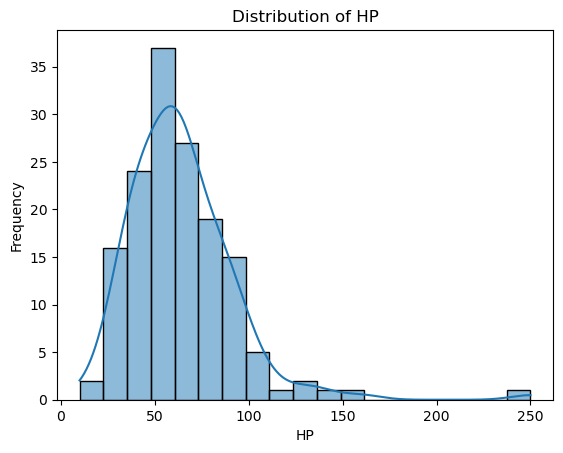

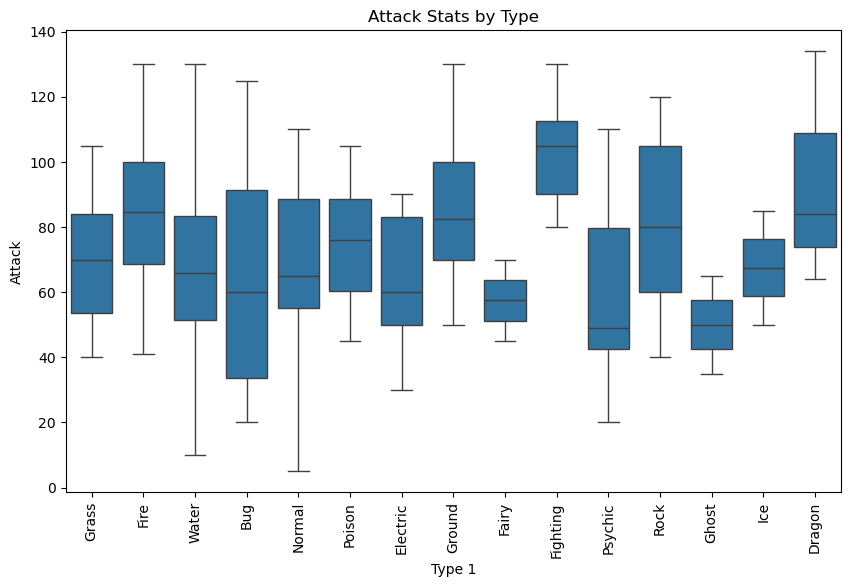

In [48]:
#Histogram of HP
sns.histplot(df_cleaned['HP'], kde=True)
plt.title("Distribution of HP")
plt.xlabel("HP")
plt.ylabel("Frequency")
plt.show()

#Boxplot of Attack by Type 1
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='Type 1', y='Attack')
plt.xticks(rotation=90)
plt.title("Attack Stats by Type")
plt.show()

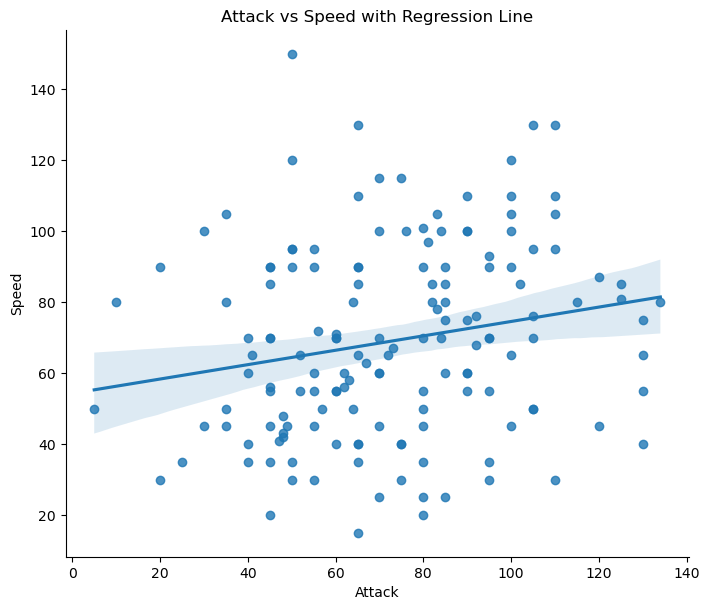

In [47]:
#Scatterplot with regression line
sns.lmplot(data=df_cleaned, x='Attack', y='Speed', height=6, aspect=1.2)
plt.title("Attack vs Speed with Regression Line")
plt.show()